In [ ]:
!cd /content

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob2
import os, fnmatch
from pathlib import Path


In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.2 MB/s eta 0:00:00


In [ ]:
from mtcnn import MTCNN

In [ ]:
def extract_multiple_videos(input_filenames, image_path_infile):
    """Extract video files into sequences of images."""
    i = 1  # Counter for the frames

    # Iterate through file names:
    cap = cv2.VideoCapture(input_filenames)  # Open the video file
    if not cap.isOpened():
        print("Error opening file:", input_filenames)
        return

    while True:
        ret, frame = cap.read()  # Read a frame from the video

        if ret:
            image_filename = os.path.join(image_path_infile, f"{i}.jpg")
            cv2.imwrite(image_filename, frame)  # Write frame to a JPEG file
            i += 1  # Advance the counter
            cv2.waitKey(50)  # Introduce a delay between frames
        else:
            break  # Break the loop if no more frames are available

    cap.release()  # Release the video capture object

In [ ]:
os.mkdir("/content/fake_frames")

In [ ]:
os.mkdir("/content/real_frames")

In [ ]:
# Define your video file paths and image paths
fake_video_name = '/content/sa1-video-fram1.avi'
fake_image_path_for_frame = '/content/fake_frames'
real_video_name = '/content/sa1.avi'
real_image_path_for_frame = '/content/real_frames'

In [ ]:
# Call the function to extract frames from fake and real videos
extract_multiple_videos(fake_video_name, fake_image_path_for_frame)
extract_multiple_videos(real_video_name, real_image_path_for_frame)

In [ ]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim

In [ ]:
def compare_images(imageA, imageB, title):
    if imageA is None or imageB is None:
        print("Error: One or both images are not loaded correctly.")
        return
    m = mse(imageA, imageB)
    s = compare_ssim(imageA, imageB)

    fig = plt.figure(title)
    # plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap=plt.cm.gray)
    plt.title("Real")
    plt.axis("off")

    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap=plt.cm.gray)
    plt.title("Fake")
    plt.axis("off")

    plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# Load your images for comparison (replace with actual paths)
imageA = cv2.imread('/content/real_frames/1.jpg', cv2.IMREAD_GRAYSCALE)
imageB = cv2.imread('/content/fake_frames/100.jpg', cv2.IMREAD_GRAYSCALE)
# cv2_imshow(imageA)
# cv2_imshow(imageB)

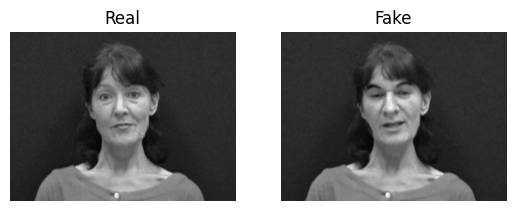

In [ ]:

# Call the function to compare two images
compare_images(imageA, imageB, "Image Comparison")
